## Plot low-dimensional embeddings of the (truncated) contagion maps on noisy ring lattice networks

In [1]:
%load_ext autoreload
%autoreload 2

import cmap as conmap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_theme()
import pandas as pd

# For pretty colourmaps
import palettable
from matplotlib.colors import ListedColormap

sns.set_style("white")

from sklearn.decomposition import PCA


In [2]:
# construct the network
noisyRL = conmap.constructNoisyRingLattice(numberNodes=400,geometricDegree=6,nongeometricDegree=2)

In [3]:
# run the contagions for four different thresholds
seeding = list(noisyRL.neighbors(0))
seeding.append(0)
activationTimes_t005 = conmap.simulateWattsThresholdModel(network=noisyRL,initialCondition=seeding,threshold=0.05)
activationTimes_t02 = conmap.simulateWattsThresholdModel(network=noisyRL,initialCondition=seeding,threshold=0.2)
activationTimes_t03 = conmap.simulateWattsThresholdModel(network=noisyRL,initialCondition=seeding,threshold=0.3)
activationTimes_t045 = conmap.simulateWattsThresholdModel(network=noisyRL,initialCondition=seeding,threshold=0.45)

<Figure size 432x288 with 0 Axes>

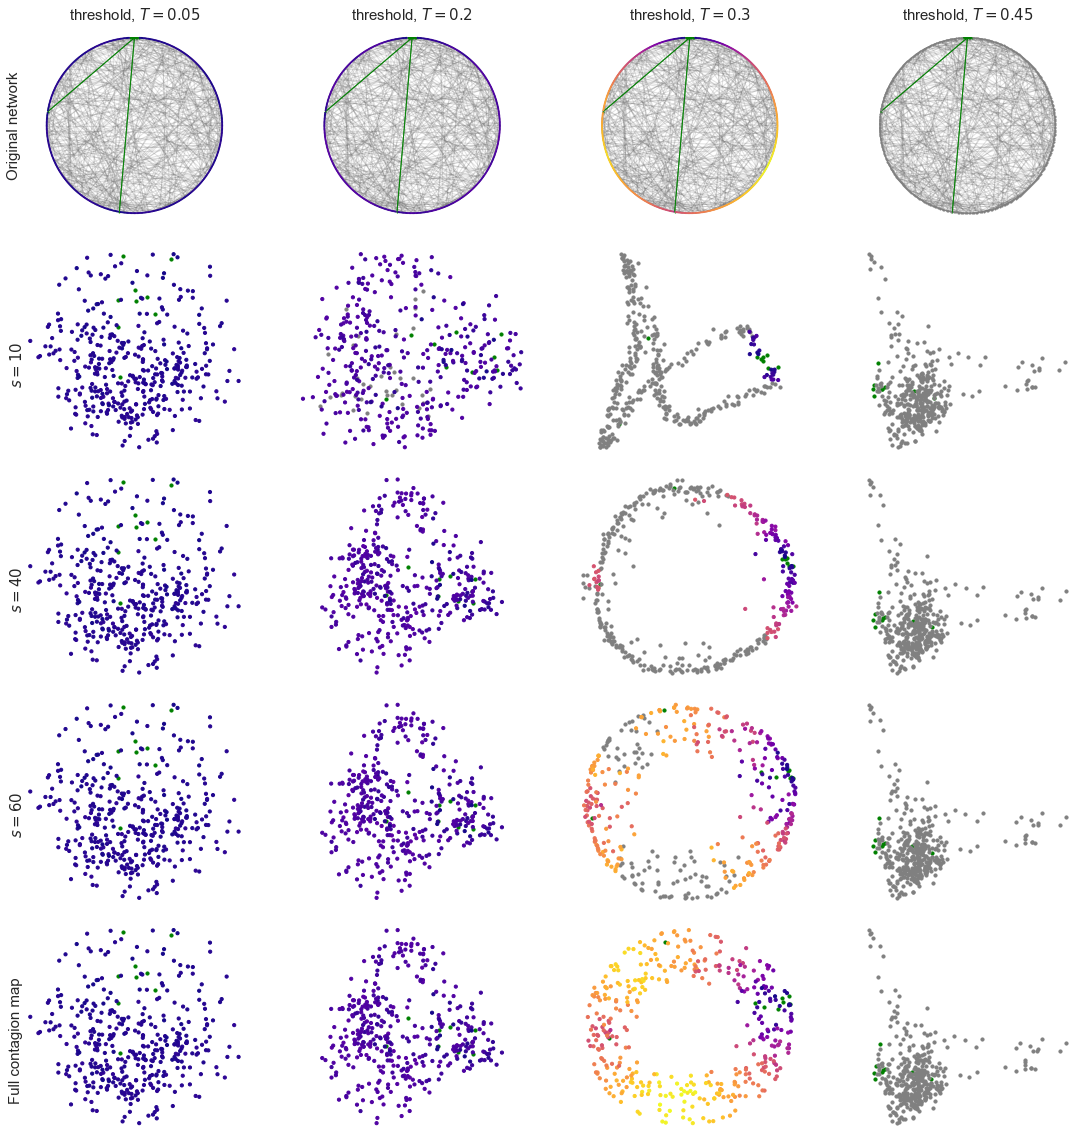

In [4]:
### Create a nice figure of
# a) Networks
# b) Truncated contagion maps
# c) Original contagion maps

plt.set_cmap('plasma')


vmaxAll = np.max(activationTimes_t03)

nrows=5
ncols=4
nTotal = nrows*ncols

fig = plt.figure(figsize=(16,16))


### a) Networks
ax = fig.add_subplot(nrows,ncols,1)
plt.text(-1.45,0,'Original network',size=15,rotation=90,va='center')


plt.text(0,1.2,'threshold, $T=0.05$',size=15,ha='center')


conmap.plotGraphWithActivationTimes(noisyRL,activationTimes_t005,vmax=vmaxAll)
 # Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,2)

plt.text(0,1.2,'threshold, $T=0.2$',size=15,ha='center')

conmap.plotGraphWithActivationTimes(noisyRL,activationTimes_t02,vmax=vmaxAll)
 # Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,3)
plt.text(0,1.2,'threshold, $T=0.3$',size=15,ha='center')

conmap.plotGraphWithActivationTimes(noisyRL,activationTimes_t03,vmax=vmaxAll)
 # Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,4)
plt.text(0,1.2,'threshold, $T=0.45$',size=15,ha='center')

conmap.plotGraphWithActivationTimes(noisyRL,activationTimes_t045,vmax=vmaxAll)
 # Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')


### b) Truncated contagion maps

# run truncated contagion maps
s=10
contagionMap_t005_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.005,numberSteps=s)
contagionMap_t02_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.2,numberSteps=s)
contagionMap_t03_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.3,numberSteps=s)
contagionMap_t045_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.45,numberSteps=s)

# plotting
ax = fig.add_subplot(nrows,ncols,ncols+1)
plt.text(-30,0,'$s=10$',size=15,rotation=90,va='center')

#plt.text(-1.2,0,'Original network',size=15,rotation=90,va='center')


activationTimes_t005This = np.where(activationTimes_t005 > s, np.nan, activationTimes_t005)

conmap.plotTwoDimensionalEmbedding(contagionMap_t005_truncated,activationTimes_t005This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,ncols+2)
activationTimes_t02This = np.where(activationTimes_t02 > s, np.nan, activationTimes_t02)
conmap.plotTwoDimensionalEmbedding(contagionMap_t02_truncated,activationTimes_t02This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')


ax = fig.add_subplot(nrows,ncols,ncols+3)
activationTimes_t03This = np.where(activationTimes_t03 > s, np.nan, activationTimes_t03)
conmap.plotTwoDimensionalEmbedding(contagionMap_t03_truncated,activationTimes_t03This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,ncols+4)
activationTimes_t045This = np.where(activationTimes_t045 > s, np.nan, activationTimes_t045)
conmap.plotTwoDimensionalEmbedding(contagionMap_t045_truncated,activationTimes_t045This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

# run truncated contagion maps
s=40
contagionMap_t005_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.005,numberSteps=s)
contagionMap_t02_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.2,numberSteps=s)
contagionMap_t03_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.3,numberSteps=s)
contagionMap_t045_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.45,numberSteps=s)

# plotting
ax = fig.add_subplot(nrows,ncols,2*ncols+1)
#plt.text(-25,27,'Truncated contagion map with $s=40$',size=15)
plt.text(-30,0,'$s=40$',size=15,rotation=90,va='center')

activationTimes_t005This = np.where(activationTimes_t005 > s, np.nan, activationTimes_t005)

conmap.plotTwoDimensionalEmbedding(contagionMap_t005_truncated,activationTimes_t005This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,2*ncols+2)
activationTimes_t02This = np.where(activationTimes_t02 > s, np.nan, activationTimes_t02)
conmap.plotTwoDimensionalEmbedding(contagionMap_t02_truncated,activationTimes_t02This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')


ax = fig.add_subplot(nrows,ncols,2*ncols+3)
activationTimes_t03This = np.where(activationTimes_t03 > s, np.nan, activationTimes_t03)
conmap.plotTwoDimensionalEmbedding(contagionMap_t03_truncated,activationTimes_t03This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,2*ncols+4)
activationTimes_t045This = np.where(activationTimes_t045 > s, np.nan, activationTimes_t045)
conmap.plotTwoDimensionalEmbedding(contagionMap_t045_truncated,activationTimes_t045This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')


# run truncated contagion maps
s=60
contagionMap_t005_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.005,numberSteps=s)
contagionMap_t02_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.2,numberSteps=s)
contagionMap_t03_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.3,numberSteps=s)
contagionMap_t045_truncated = conmap.runTruncatedContagionMap(noisyRL,threshold=0.45,numberSteps=s)

# plotting
ax = fig.add_subplot(nrows,ncols,3*ncols+1)
#plt.text(-25,27,'Truncated contagion map with $s=60$',size=15)
plt.text(-30,0,'$s=60$',size=15,rotation=90,va='center')

activationTimes_t005This = np.where(activationTimes_t005 > s, np.nan, activationTimes_t005)

conmap.plotTwoDimensionalEmbedding(contagionMap_t005_truncated,activationTimes_t005This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,3*ncols+2)
activationTimes_t02This = np.where(activationTimes_t02 > s, np.nan, activationTimes_t02)
conmap.plotTwoDimensionalEmbedding(contagionMap_t02_truncated,activationTimes_t02This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')


ax = fig.add_subplot(nrows,ncols,3*ncols+3)
activationTimes_t03This = np.where(activationTimes_t03 > s, np.nan, activationTimes_t03)
conmap.plotTwoDimensionalEmbedding(contagionMap_t03_truncated,activationTimes_t03This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,3*ncols+4)
activationTimes_t045This = np.where(activationTimes_t045 > s, np.nan, activationTimes_t045)
conmap.plotTwoDimensionalEmbedding(contagionMap_t045_truncated,activationTimes_t045This,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')





### c) Contagion maps

contagionMap_t005= conmap.runTruncatedContagionMap(noisyRL,threshold=0.005,numberSteps=np.Inf)
contagionMap_t02 = conmap.runTruncatedContagionMap(noisyRL,threshold=0.2,numberSteps=np.Inf)
contagionMap_t03 = conmap.runTruncatedContagionMap(noisyRL,threshold=0.3,numberSteps=np.Inf)
contagionMap_t045 = conmap.runTruncatedContagionMap(noisyRL,threshold=0.45,numberSteps=np.Inf)

ax = fig.add_subplot(nrows,ncols,nTotal-3)
#plt.text(-25,27,'Full contagion map',size=15)
plt.text(-30,0,'Full contagion map',size=15,rotation=90,va='center')


conmap.plotTwoDimensionalEmbedding(contagionMap_t005,activationTimes_t005,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

ax = fig.add_subplot(nrows,ncols,nTotal-2)
conmap.plotTwoDimensionalEmbedding(contagionMap_t02,activationTimes_t02,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')


ax = fig.add_subplot(nrows,ncols,nTotal-1)
conmap.plotTwoDimensionalEmbedding(contagionMap_t03,activationTimes_t03,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')



ax = fig.add_subplot(nrows,ncols,nTotal)
conmap.plotTwoDimensionalEmbedding(contagionMap_t045,activationTimes_t045,vmax=vmaxAll)
# Further adjustments
ax.set_aspect('equal', adjustable='box')
plt.axis('off')
plt.tight_layout()
plt.savefig('./figures/Fig5-embeddingTruncatedContagionMaps.pdf')
#plt.savefig('./figures/Fig5-embeddingTruncatedContagionMaps.png')